In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import re
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [65]:
salary_df = pd.read_csv('hawks_salary.csv')
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 13 columns):
No.           23 non-null object
Player        24 non-null object
Flag          24 non-null object
Pos           24 non-null object
Age           24 non-null int64
Ht            24 non-null object
Wt            24 non-null int64
S/C           24 non-null object
Exp           24 non-null object
Birth Date    24 non-null object
Summary       22 non-null object
Salary        23 non-null object
Draft         20 non-null object
dtypes: int64(2), object(11)
memory usage: 2.6+ KB


In [66]:
salary_df.head()

,No.,Player,Flag,Pos,Age,Ht,Wt,S/C,Exp,Birth Date,Summary,Salary,Draft
0,NaN,Nicolas Beaudin\beaudni01,ca,D,20,5-11,168,L/-,R,October 7 1999,NaN,NaN,2018 CHI 1st (27)
1,27,Adam Boqvist\boqviad01,se,D,19,5-11,179,R/-,R,August 15 2000,4 G 9 A 13 P,"$925,000",2018 CHI 1st (8)
2,91,Drake Caggiula\caggidr01,ca,F,25,5-10,176,L/-,3,June 20 1994,9 G 6 A 15 P,"$1,500,000",NaN
3,46-47,Lucas Carlsson\carlslu01,se,D,22,6-0,189,L/-,R,July 5 1997,0 G 1 A 1 P,"$792,500",2016 CHI 4th (110)
4,22,Ryan Carpenter\carpery01,us,F,29,6-0,200,R/-,4,January 18 1991,3 G 12 A 15 P,"$1,000,000",NaN


In [67]:
salary_df = salary_df[1:]

In [68]:
col_titles = ['no.', 'name', 'nationality', 'pos', 'age', 'ht', 'wt', 'hand', 'exp', 'birth_date', 'summary', 'salary', 'draft']
salary_df.columns = col_titles

In [69]:
names = salary_df.name.tolist()
new_names = []
for name in names:
    new_names.append(name.split("\\")[0])
    
salary_df['name'] = new_names

In [70]:
country_dict = {'se':'SWE', 'ca':'CAN', 'us':'USA', 'cz':'CZE', 'fi':'FIN','ru':'RUS', 'ge':'GER'}
salary_df.nationality = salary_df.nationality.replace(country_dict)

In [71]:
handedness = salary_df.hand.tolist()
new_hand = []
for x in handedness:
    new_hand.append(x.split("/")[0])

salary_df['hand'] = new_hand

In [72]:
salary = salary_df.salary.tolist()
new_salary = []
for x in salary:
    x = x.replace(",","")
    new_salary.append(x.split("$")[1])
    
salary_df['salary'] = new_salary
salary_df.salary = salary_df.salary.astype('int')

In [73]:
salary_df.exp.replace({'R':'0.5'}, inplace = True)

In [74]:
index_names = salary_df[(salary_df.name == 'Corey Crawford') | (salary_df.name == 'Malcolm Subban')].index
salary_df.drop(index_names, inplace = True)

In [75]:
heights = salary_df.ht.tolist()
new_heights = []
for x in heights:
    x = (int(x.split('-')[0]) * 12) + (int(x.split('-')[1]))
    new_heights.append(x)
    
salary_df.ht = new_heights

In [76]:
salary_df.drop(['summary', 'draft', 'birth_date'], axis = 1, inplace = True)

In [77]:
positions = ['F', 'D']
salary_df = salary_df[salary_df['pos'].isin(positions)]

In [78]:
salary_df.replace('Jonathan Toews (C)', 'Jonathan Toews', inplace = True)

# Skaters DB

In [79]:
hawks_df = pd.read_csv('skaters.csv')
hawks_df = hawks_df[(hawks_df.team == 'CHI') & (hawks_df.situation == 'all')]

In [80]:
full_hawks_df = pd.merge(hawks_df, salary_df, on = ['name'], how = 'outer')

In [81]:
full_hawks_df = full_hawks_df.drop(labels = ['no.', 'pos'], axis = 1)

In [82]:
seabrook = {'name': 'Brent Seabrook', 'nationality':'CAN', 'age': 34, 'ht': 75, 'wt': '220', 'hand':'R', 'exp': 15, 'salary': 6875000}
sikura = {'name': 'Dylan Sikura', 'nationality': 'CAN', 'age':24, 'ht':71, 'wt':166, 'hand': 'L', 'exp': 3 , 'salary': 750000}
dehaan = {'name':'Calvin de Haan', 'nationality': 'CAN', 'age':28, 'ht':73, 'wt':195, 'hand': 'L', 'exp': 8 , 'salary': 4550000}
gilbert = {'name':'Dennis Gilbert', 'nationality': 'USA', 'age':23, 'ht':74, 'wt':216, 'hand': 'L', 'exp': 0.5 , 'salary': 925000}
nylander = {'name':'Alex Nylander', 'nationality': 'SWE', 'age':22, 'ht':73, 'wt':192, 'hand': 'R', 'exp': 4 , 'salary': 863333}
quenneville = {'name':'John Quenneville', 'nationality': 'CAN', 'age':23, 'ht':73, 'wt':195, 'hand': 'L', 'exp': 3 , 'salary': 750000}
wedin = {'name':'Anton Wedin','nationality': 'SWE', 'age':27, 'ht': 71, 'wt':195, 'hand': 'L', 'exp': 0.5 , 'salary': 925000}
beaudin = {'name':'Nicolas Beaudin','nationality': 'CAN', 'age':20, 'ht':71, 'wt':172, 'hand': 'L', 'exp': 0.5 , 'salary': 894167}
shaw = {'name':'Andrew Shaw','nationality': 'CAN', 'age':28, 'ht':71, 'wt':182, 'hand': 'R', 'exp': 9 , 'salary':3900000}

In [83]:
empty_players = ['Brent Seabrook', 'Dylan Sikura', 'Calvin de Haan', 'Dennis Gilbert', 'Alex Nylander', 'John Quenneville', 'Anton Wedin', 'Nicolas Beaudin', 'Andrew Shaw']
empty_player_dicts = [seabrook, sikura, dehaan, gilbert, nylander, quenneville, wedin, beaudin, shaw]
cols_replace = ['nationality', 'age', 'ht', 'wt', 'hand', 'exp', 'salary']

In [84]:
for player in empty_players:
    for pdict in empty_player_dicts:
        full_hawks_df[full_hawks_df.name == player] = full_hawks_df.fillna(pdict)

In [85]:
df = full_hawks_df.drop(full_hawks_df.tail(1).index)

In [86]:
df_cols = df.columns.tolist()
cols = [x.lower().replace('i_f_', "") for x in df_cols]
df.columns = cols

# Visualizing in Seaborn

In [87]:
df_viz = df[['name','position','games_played', 'age', 'salary', 'icetime', 'points', 'goals', 'penalties', 'hits', 'giveaways', 'takeaways']]
df_viz['assists'] = df.primaryassists + df.secondaryassists
df_viz.position.replace(['L', 'R', 'C'], 'F', inplace = True)

In [56]:
df_viz.set_index('name', inplace = True)

In [57]:
df_viz.head()

,position,games_played,age,salary,icetime,points,goals,penalties,hits,giveaways,takeaways,assists
name,,,,,,,,,,,,
Nick Seeler,D,12.0,26.0,750000.0,8588.0,1.0,0.0,6.0,19.0,7.0,1.0,1.0
Brent Seabrook,D,32.0,34.0,6875000.0,34867.0,4.0,3.0,4.0,52.0,27.0,3.0,1.0
Drake Caggiula,F,40.0,25.0,1500000.0,28344.0,15.0,9.0,13.0,81.0,5.0,19.0,6.0
Connor Murphy,D,58.0,26.0,4400000.0,73928.0,19.0,5.0,12.0,128.0,44.0,17.0,14.0
Matthew Highmore,F,36.0,23.0,817500.0,21196.0,6.0,2.0,3.0,38.0,9.0,15.0,4.0


## Scatter Plot -- sns.relplot()

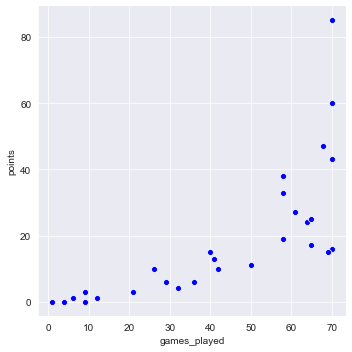

In [58]:
sns.relplot(data = df_viz, x = 'games_played', y = 'points', color = 'blue')
plt.tight_layout()

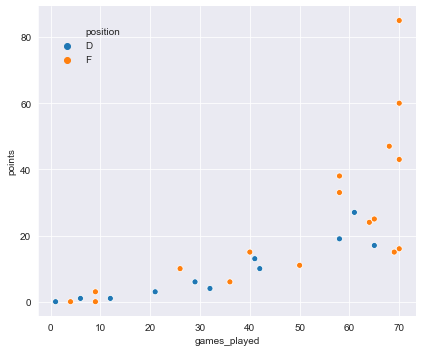

In [59]:
r = sns.relplot(data = df_viz, x = 'games_played', y = 'points', hue = 'position')
leg = r._legend
leg.set_bbox_to_anchor([0.3,0.85])
plt.tight_layout()

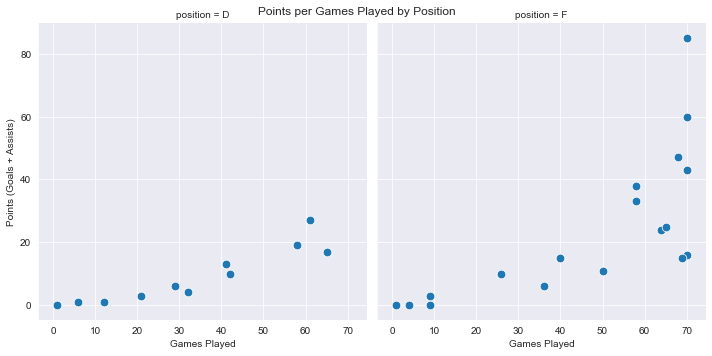

In [95]:
r2 = sns.relplot(data = df_viz, x = 'games_played', y = 'points', col = 'position', s = 75, palette = ["b", "r"])
r2.set_xlabels('Games Played')
r2.set_ylabels('Points (Goals + Assists)')
r2.fig.suptitle('Points per Games Played by Position')
plt.tight_layout()

## Boxplot -- sns.catplot()

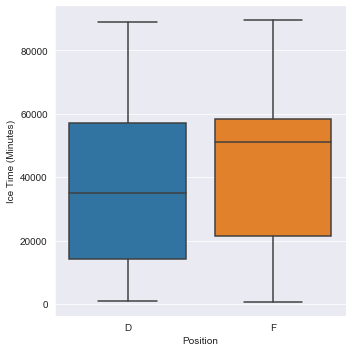

In [108]:
f = sns.catplot(data = df_viz, x = 'position', y = 'icetime', kind = 'box')
f.set_xlabels('Position')
f.set_ylabels('Ice Time (Minutes)')
plt.tight_layout()

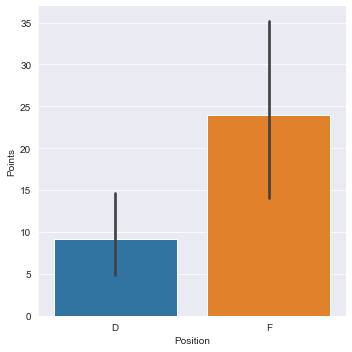

In [129]:
b = sns.catplot(data = df_viz, x = 'position', y = 'points', kind = 'bar')
b.set_xlabels('Position')
b.set_ylabels('Points')
plt.tight_layout()

## Histogram

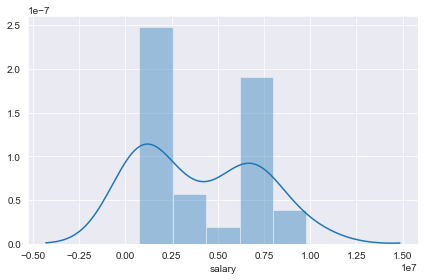

In [140]:
sns.distplot(df_viz.salary, bins = 5)
plt.tight_layout()